In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os
images = []
y_train = []
for dicname in sorted(os.listdir("./train/")):           #filedir = "dicname"
    train_folder_path = os.path.join(os.getcwd(), "train", dicname)
    
    for filename in sorted(os.listdir(train_folder_path)):
        
        img = cv2.imread(os.path.join(train_folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (336,336))
            images.append(img)
            
            if dicname == "street":
                y_train.append(1)
            elif dicname == "industrial":
                y_train.append(2)
            elif dicname == "insidecity":
                y_train.append(3)
            elif dicname == "forest":
                y_train.append(4)
            elif dicname == "livingroom":
                y_train.append(5)
            elif dicname == "opencountry":
                y_train.append(6)
            elif dicname == "PARoffice":
                y_train.append(7)
            elif dicname == "mountain":
                y_train.append(8)
            elif dicname == "CALsuburb":
                y_train.append(9)
            elif dicname == "coast":
                y_train.append(10)
            elif dicname == "store":
                y_train.append(11)
            elif dicname == "bedroom":
                y_train.append(12)
            elif dicname == "tallbuilding":
                y_train.append(13)
            elif dicname == "highway":
                y_train.append(14)
            elif dicname == "kitchen":
                y_train.append(0)
                
x_train = np.array(images)
#y_train = np.array(y_train)
#y_trian =  pd.get_dummies(y_train)
#y_train = np.array(y_train)

In [62]:
y_train= pd.get_dummies(y_train)
y_train = np.array(y_train)
print(y_train.shape)
print(x_train.shape)

(2985, 15)
(2985, 336, 336, 3)


In [63]:
'''
print(y_train[2])
plt.imshow(x_train[2])
'''

'\nprint(y_train[2])\nplt.imshow(x_train[2])\n'

In [64]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state= 20, shuffle=True)
print("x_train shape:", x_train.shape)
print("numbers of training sample:", x_train.shape[0])
print("numbers of testing sample:", y_train.shape)

x_train shape: (2388, 336, 336, 3)
numbers of training sample: 2388
numbers of testing sample: (2388, 15)


In [66]:
import keras
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications import vgg16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121
from keras import backend as K
from keras.layers.normalization import BatchNormalization

base_model = vgg16.VGG16(weights='imagenet', include_top=False,input_shape = (336,336,3)) 
#base_model = DenseNet121(weights='imagenet', include_top=False,input_shape = (336,336,3)) 
#base_model = InceptionV3(weights='imagenet', include_top=False,input_shape = (224,224,3))

for layer in base_model.layers:
    layer.trainable = True
# 添加全局平均池化层

x = base_model.output
#x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
# 添加一个全连接层

x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
# 添加一个分类器，假设我们有200个类

predictions = Dense(15, activation='softmax')(x)
# 构建我们需要训练的完整模型

model = Model(inputs=base_model.input, outputs=predictions)

# 首先，我们只训练顶部的几层（随机初始化的层）
# 锁住所有 InceptionV3 的卷积层


# 编译模型（一定要在锁层以后操作）
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')



In [67]:
from keras.optimizers import SGD, Adam

#model = VGG_16()
optimizer = SGD(lr=0.0005, momentum=0.9)
#optimizer = Adam(lr=0.001)

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255.
x_valid /= 255.

In [68]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=0,  # randomly rotate images in the range -30~30
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

Using real-time data augmentation.


In [69]:
#os.chdir('///home/jovyan/program/DL/11_1下tensorflow_simpson')
save_dir = os.path.join(os.getcwd(),'saved_model')
print(os.getcwd())
model_name = "classification_cnndensenet_model1"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_loss', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose =1)

/home/jovyan/Kaggle_test/image_classification_CNN


In [70]:
#model.summary()

In [71]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [72]:
batch_size = 15
epochs = 100
#workers = 用4個GPU
#verbose是否再進度調顯示
model_history = model.fit_generator(datagen.flow(x_train, y_train,
                                batch_size=batch_size),
                         epochs=epochs,
                         workers=4,
                         validation_data=(x_valid, y_valid),
                         callbacks=[checkpoint, earlystop])
#model_history = model.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs=20, batch_size=20);                                   
print("Loading trained model")
model = load_model(model_path)

Epoch 1/100
160/160 [==============================] - 64s 398ms/step - loss: 1.4932 - acc: 0.5254 - val_loss: 1.9891 - val_acc: 0.4539

Epoch 00001: val_loss improved from inf to 1.98909, saving model to /home/jovyan/Kaggle_test/image_classification_CNN/saved_model/classification_cnndensenet_model1
Epoch 2/100
160/160 [==============================] - 49s 305ms/step - loss: 0.8386 - acc: 0.7267 - val_loss: 0.8024 - val_acc: 0.7404

Epoch 00002: val_loss improved from 1.98909 to 0.80236, saving model to /home/jovyan/Kaggle_test/image_classification_CNN/saved_model/classification_cnndensenet_model1
Epoch 3/100
160/160 [==============================] - 49s 304ms/step - loss: 0.5975 - acc: 0.8113 - val_loss: 0.5149 - val_acc: 0.8191

Epoch 00003: val_loss improved from 0.80236 to 0.51485, saving model to /home/jovyan/Kaggle_test/image_classification_CNN/saved_model/classification_cnndensenet_model1
Epoch 4/100
160/160 [==============================] - 49s 307ms/step - loss: 0.4277 - ac

In [73]:
#print(pd.DataFrame(model.predict(x_valid)))

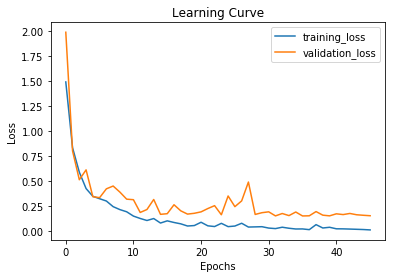

In [74]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

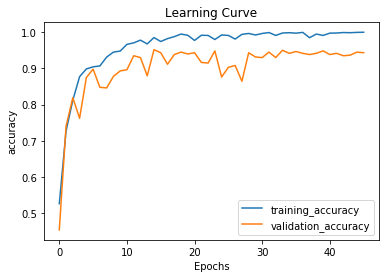

In [75]:
training_acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [76]:
scores = model.evaluate(x_valid, y_valid, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

597/597 [==============================] - 10s 16ms/step
Test loss: 0.15286860628743068
Test accuracy: 0.9463986600663394


In [77]:
example = pd.read_csv("img-submission.csv")

In [78]:
import os
test_set = []

'''
for filename in sorted(os.listdir("./testset/")):
    img = cv2.imread(os.path.join("./testset/",filename))
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (224,224))
        test_set.append(img)
'''
for filename in example.iloc[:,0].values:
    filename=filename+".jpg"
    img = cv2.imread(os.path.join("./testset/",filename,))
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (336,336))
        test_set.append(img)
        
test_set = np.array(test_set)
test_set = test_set.astype('float32')
test_set /= 255

In [79]:
#print(model.predict(test_set))
#result = np.argmax(test_pred, axis =1)
#result = np.argmax(model.predict(test_set), axis =1)
#result

In [80]:
test_set.shape

(1500, 336, 336, 3)

In [81]:
id_test=[]
for filename in example.iloc[:,0].values:
    #filename = filename.rstrip(".jpg")
    id_test.append(filename)

In [82]:
id_test = np.array(id_test)

In [83]:
test_pred =model.predict(test_set)
result = np.argmax(test_pred, axis =1)
output = list(zip(id_test, result))
df = pd.DataFrame(data = output, columns=['id','class'])
df.to_csv('result_densenet.csv', index =False, header = True)

In [84]:
#example.iloc[:,0].values

In [85]:
output

[('c117693e1cf24a5232090d1548cb11d4e5ea0df65680c4a56a8e8aa2beede330', 12),
 ('96baacc2e97886a998807ce197574821a6dc83c227c7469961c01ab315908371', 14),
 ('f9bd26db23eb9b544ca78be79b11b4d1259e802885861d8b66a8e709995229db', 0),
 ('b42bcd8e6645fcc2ac40ee44b7dc8d74a77081d0aea7a1a88eaba3d8393001c3', 5),
 ('5bc53cef9168882f0ff67a81b3e7269f62b7fd5343d06dafe63570d5032c21f3', 2),
 ('f80823d6bff6c0beba6d55a3157d7a4fa2de4f966351e0fa7d322e5962f46ece', 7),
 ('3a12151639cf9f8e2af9ea36c2ce6bb15dd8730ea6dc904621dd754ebd3c1155', 13),
 ('a5e0980425df5b98864a9580e081a7209e1b6810ed515afab1617cdc62299ac1', 10),
 ('d4ea833073c4391387bebaef3c51c22861c1ff108cbb3c52f33c0dc3c81564f0', 11),
 ('013c78d920be5390dbc66ca238ae3f49a2b0cf13e3601331678b871fc0d4a237', 8),
 ('2390366350839d8f2e52faa4b491734171cf88bf948a8fe1a75d23423529d12f', 0),
 ('e1dbee71db867f7a9b86861654e4335f058b5f3040ee624e517dc6acb219d399', 3),
 ('235793ff4b3fd913564da420c0ab3e06b004d1b3852b763d2089f42f9f65f6e8', 3),
 ('ad8c7c4f51d832e6ec7de77af21655